In [332]:

!pip install xgboost==0.90

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_auc_score


In [334]:
df = pd.read_csv('dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,"1,889.50",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"1,840.75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [335]:
# I will droping customer ID as it does not target
df.drop(['customerID'], axis = 1, inplace = True)

In [336]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"1,889.50",No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [337]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [338]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the TotalCharges Column and I will be filling them with the mean for that column

In [339]:
# Fill missing values
df.fillna(df['TotalCharges'].mean(), inplace = True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###  Encoding categorical data

In [340]:
# Encoding data with label encoder
# le = LabelEncoder()
# df =df.apply(le.fit_transform)
category_col =['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]
labelEncoder =LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'gender': {'Female': 0, 'Male': 1}, 'Partner': {'No': 0, 'Yes': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'No': 0, 'Yes': 1}, 'PaymentMethod': {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}, 'Churn': {'No': 0, 'Yes': 1}}


In [341]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,"1,889.50",0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,"1,840.75",0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [342]:
df.shape

(7043, 20)

### Using Correlation Matrix to calculate correlation between values in the dataset

In [343]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.15,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.67,0.01,-0.37,0.25,0.82,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.02,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.00,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.04,-0.03,0.11,0.10,0.10,-0.14,0.09,-0.32,-0.18,-0.05
OnlineSecurity,-0.02,-0.13,0.15,0.15,0.33,-0.02,0.01,-0.03,1.00,0.19,0.18,0.29,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.19,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.12,0.12,0.38,-0.20


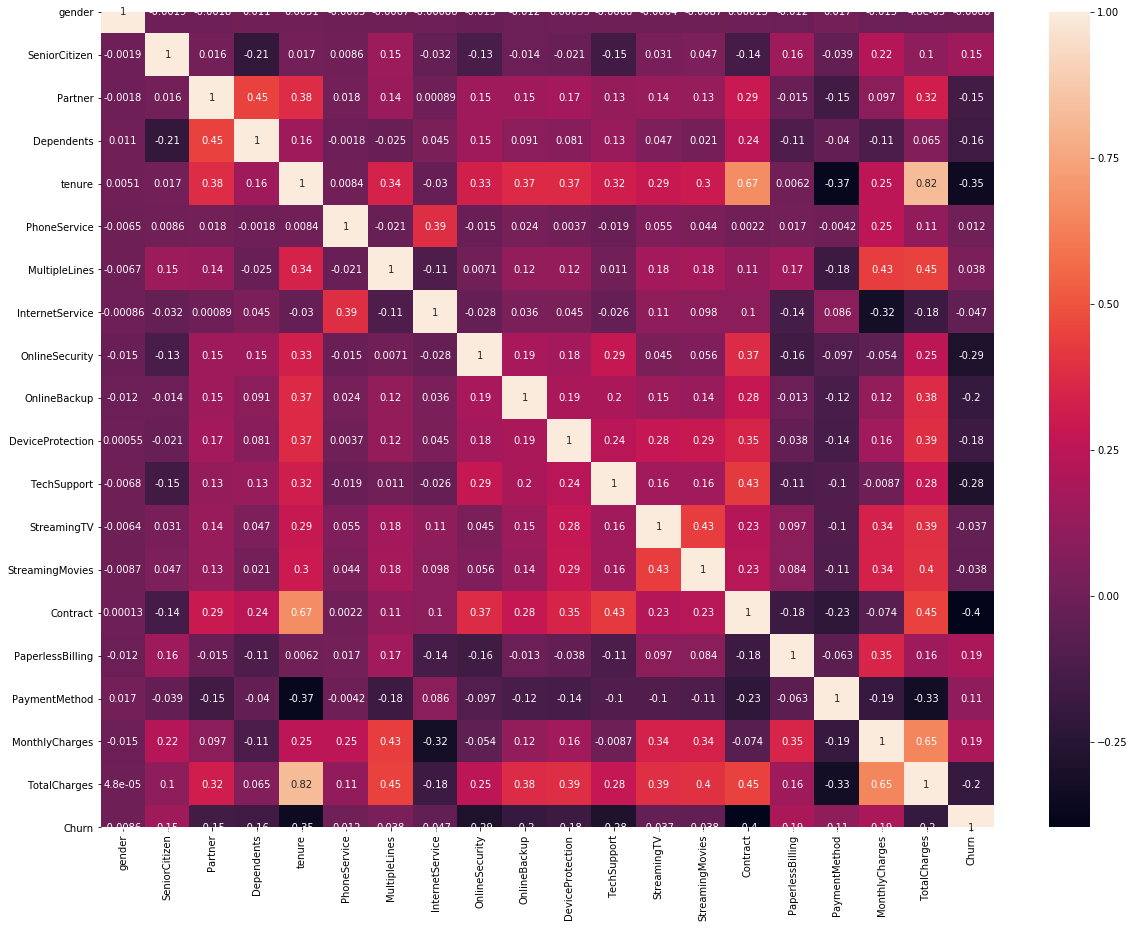

In [344]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [345]:
# split data into X and Y train
y = df[['Churn']]
X = df.drop(['Churn'],axis=1)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

## Feature importance using Extreme Gradient Boosting

/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importances :  [0.00956637 0.02070871 0.00193361 0.01242361 0.05303381 0.00492159
 0.01940896 0.05917701 0.10033583 0.02655084 0.00799288 0.16419846
 0.02457108 0.04261872 0.35353082 0.01689512 0.03197336 0.02779775
 0.02236148]


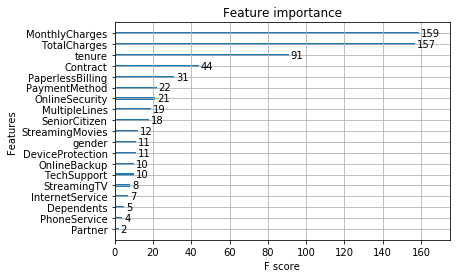

In [347]:
from xgboost import plot_importance, XGBClassifier

# fit model to training data
xgb_model = XGBClassifier(random_state = 43 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()


### The plot above shows that our 6 most relevant features are TotalCharges, MonthlyCharges, tenure, Contract, PaperlessBilling, and Payment Meethod

##  Areas where customers churn a lot

In [348]:
# List of columns for relevant features
features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'PaymentMethod']
target_data =[['Churn']]
feature_data = df[features]
feature_data.head()

,MonthlyCharges,TotalCharges,tenure,Contract,PaymentMethod
0,29.85,29.85,1,0,2
1,56.95,"1,889.50",34,1,3
2,53.85,108.15,2,0,3
3,42.30,"1,840.75",45,1,0
4,70.70,151.65,2,0,2


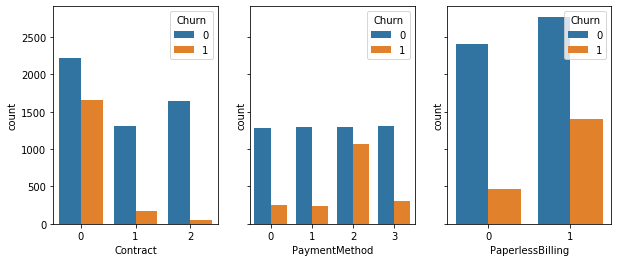

In [349]:
import seaborn as sns
_, axes = plt.subplots(1, 3, sharey = True, figsize=(10,4))

sns.countplot(x = 'Contract', hue = 'Churn', data = df, ax = axes[0]);
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df, ax = axes[1]);
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df, ax = axes[2]);

### From the above plot we notice that churn is high  for contract category 0 customers, i.e Customers with a month-to-month contract, Payment category 2 , i.e, customers with payment method  of Electronic check, There is also high churn among customers who use paperlessbilling.

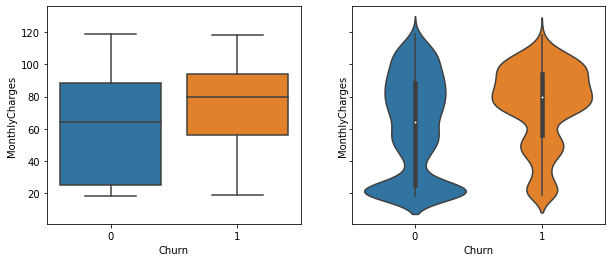

In [350]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='MonthlyCharges', data = df, ax = axes[0]);
sns.violinplot(x='Churn', y='MonthlyCharges', data = df, ax = axes[1]);


#### From the box plot above we may say that customers with averagely high monthly charges are not loyal.

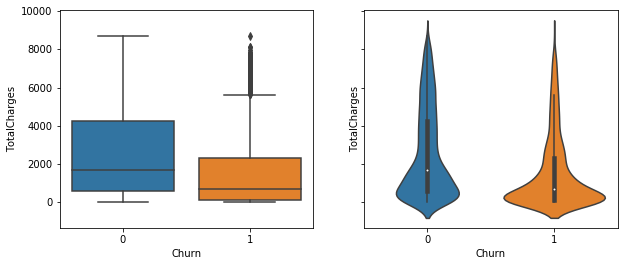

In [351]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='TotalCharges', data = df, ax = axes[0]);
sns.violinplot(x='Churn', y='TotalCharges', data = df, ax = axes[1]);

####  From the box plot above we can say that most customers leave when the total chagres are getting too high.

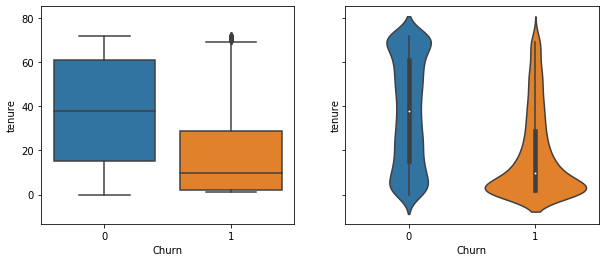

In [352]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='tenure', data = df, ax = axes[0]);
sns.violinplot(x='Churn', y='tenure', data = df, ax = axes[1]);

####  From the plot above we can see that disloyal customers stay with the computer for a shot time.

In [353]:
# Group data by 'Churn' and compute the mean 
print(df.groupby('Churn')['tenure'].mean())

Churn
0   37.57
1   17.98
Name: tenure, dtype: float64


In [354]:
# Group data by 'Churn' and compute the mean 
print(df.groupby('Churn')['MonthlyCharges'].mean())

Churn
0   61.27
1   74.44
Name: MonthlyCharges, dtype: float64


In [355]:
# Group data by 'Churn' and compute the mean 
print(df.groupby('Churn')['TotalCharges'].mean())

Churn
0   2,554.77
1   1,531.80
Name: TotalCharges, dtype: float64


## Baseline Classifier using all the features

In [356]:
y_pred = xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model AUC Score:", auc_score1)

XGB Baseline Model Accuracy: 0.8090322580645162
XGB Baseline Model AUC Score: 0.7235221245114463


## Selecting relevant features from XGB feature Importance score

In [357]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model

selection_model = XGBClassifier(max_depth = 5, learning_rate = 0.08, objective = 'binary:logistic')
selection_model.fit(select_X_train, y_train)


/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [358]:
predictions = selection_model.predict(select_X_test)      # predict for selected features of X_test
xgb_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
             # Calculating F1 score on test data
auc_score2 = roc_auc_score(y_test, predictions)

# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_accuracy)

print("Limited Features XGBoost Model AUC Score:", auc_score2)

Limited Features XGBoost Model Accuracy: 0.7978494623655914
Limited Features XGBoost Model AUC Score: 0.7011984110366648


## Selecting the relevant features manually and making predictions

In [359]:
feature_data = df[['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
target_data = df[['Churn']]
x_train,x_test,Y_train, Y_test = train_test_split(feature_data,target_data, test_size=0.3, random_state=1)
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.08, objective = 'binary:logistic')
x_train = x_train.as_matrix()
Y_train = Y_train.as_matrix()
x_test = x_test.as_matrix()
Y_test = Y_test.as_matrix()
xgb.fit(x_train, Y_train) #learns
y_prediction = xgb.predict(x_test)
acc = accuracy_score(y_prediction, Y_test)

auc_score3 = roc_auc_score(Y_test, y_prediction)

# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Manually selected Limited Features XGBoost Model Accuracy:", acc)

print("Manually selected Limited Features XGBoost Model AUC Score:",auc_score3)
acc

/home/nelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/nelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/nelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/nelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/nelson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nelson/anaconda3/lib/pyt

Manually selected Limited Features XGBoost Model Accuracy: 0.8078561287269286
Manually selected Limited Features XGBoost Model AUC Score: 0.7197298298441831


0.8078561287269286

###  Saving the model using picke

In [360]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))